In [ ]:
!wget https://github.com/mohith01/datasets/raw/main/dataset.tar.xz

--2021-10-17 10:27:09--  https://github.com/mohith01/datasets/raw/main/dataset.tar.xz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mohith01/datasets/main/dataset.tar.xz [following]
--2021-10-17 10:27:09--  https://raw.githubusercontent.com/mohith01/datasets/main/dataset.tar.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659492 (644K) [application/octet-stream]
Saving to: ‘dataset.tar.xz’

dataset.tar.xz      100%[===================>] 644.04K  --.-KB/s    in 0.04s   

2021-10-17 10:27:09 (14.4 MB/s) - ‘dataset.tar.xz’ saved [659492/659492]



In [ ]:
!tar -xvf dataset.tar.xz

MetaData.xlsx
Sample_submission.csv
test_x.csv
train.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

In [ ]:
df.head()

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,genre
0,3.9262,7.67,7,-8.565,1,1.2160,0.00646,0.87200,0.684,0.0358,150.040,audio_features,182400,NaN,5.371432,19,Dark Trap
1,5.5141,7.83,0,-6.274,1,0.6160,0.21000,0.00000,0.226,0.1990,141.882,audio_features,191437,NaN,28.234518,1,Rhythm & Blues
2,4.5024,7.70,8,-5.454,1,1.1800,0.01690,0.00000,0.160,0.6670,164.140,audio_features,297920,NaN,109.481380,9,Rhythm & Blues
3,5.0652,6.48,0,-5.287,1,0.2924,0.11800,0.00000,1.030,0.6570,161.958,audio_features,166146,NaN,106.406406,11,Hiphop
4,3.0485,8.97,1,-4.487,0,0.1632,0.01430,0.00022,0.600,0.1040,149.992,audio_features,184000,Ready2GetMaggot?,15.599168,4,hardstyle


In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
X

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating
0,3.9262,7.67,7,-8.565,1,1.2160,0.006460,0.872000,0.6840,0.0358,150.040,audio_features,182400,NaN,5.371432,19
1,5.5141,7.83,0,-6.274,1,0.6160,0.210000,0.000000,0.2260,0.1990,141.882,audio_features,191437,NaN,28.234518,1
2,4.5024,7.70,8,-5.454,1,1.1800,0.016900,0.000000,0.1600,0.6670,164.140,audio_features,297920,NaN,109.481380,9
3,5.0652,6.48,0,-5.287,1,0.2924,0.118000,0.000000,1.0300,0.6570,161.958,audio_features,166146,NaN,106.406406,11
4,3.0485,8.97,1,-4.487,0,0.1632,0.014300,0.000220,0.6000,0.1040,149.992,audio_features,184000,Ready2GetMaggot?,15.599168,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,4.9044,6.63,6,-7.616,0,0.7680,0.081900,0.000000,0.2300,0.2270,139.964,audio_features,210587,NaN,31.771828,13
15860,3.3768,9.65,10,-1.918,0,0.2104,0.000597,0.835000,0.3260,0.4070,175.029,audio_features,323809,Drum and Bass 2020,71.236803,17
15861,5.2260,4.02,5,-9.255,0,0.5960,0.188000,0.000000,0.1194,0.4830,160.046,audio_features,169046,NaN,77.302218,9
15862,2.8006,9.39,11,-7.750,0,0.2132,0.000205,0.885000,0.6720,0.0863,137.983,audio_features,261000,Top Trance Songs EVER,11.907933,8


###Features of X

**Rhythm** : This describes the tune of the music and its danceability. (float)

**Vibrance** : This field refers to how energetic the music is. (float)

**Key** : The key of a music is the group of pitches, or scale, that forms the basis of a music composition in classical, Western art, and Western pop music. (int)

**Decibel_Levels** : This field indicates how loud the music is. For instance metal trap may be louder as compared  to trance. (float)

**Mode** : Mode is used as a type of musical scale on the basis of a set of characteristic melodic and harmonic behaviours of the music. (numerical)

**Lyrics_amount** : This field determines how much part of the music consists of the lyrics as compared to its pure instrumental track. Rap music may have a higher lyric_amount than Drums & Bass. (float)

**Acoustics** : Acoustic music solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means. Eg:  string instruments, wind instruments, percussion, other instruments. This field describes how much part of the music involves acoustic instruments. (float)

**Instruments** : This field is the opposite of Lyrics_amount and helps us understand how much part of the music involves instrumental tracks. (float)

**Bounce** : This describes how lively the music is. (float)

**Valence** : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). (float)

**Beats_Speed** : Tempo describes the tempo at which a piece of music should be played. (float)

**TimeLength** : The duration of the music measured in milliseconds (double)


**Title** : Title classifies the song briefly into a subcategory. Please note that this is quite different as compared to the “Genres” attribute which is to be predicted. (Removed) 

**Hyperactivity** : This can be understood as a combination of “Beats_speed” and “valence” (float)

**MusicEraRating** : Based on the rating of the music provided by audiences of different generations.  (int)


In [ ]:
X.head()

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating
0,3.9262,7.67,7,-8.565,1,1.2160,0.00646,0.87200,0.684,0.0358,150.040,audio_features,182400,NaN,5.371432,19
1,5.5141,7.83,0,-6.274,1,0.6160,0.21000,0.00000,0.226,0.1990,141.882,audio_features,191437,NaN,28.234518,1
2,4.5024,7.70,8,-5.454,1,1.1800,0.01690,0.00000,0.160,0.6670,164.140,audio_features,297920,NaN,109.481380,9
3,5.0652,6.48,0,-5.287,1,0.2924,0.11800,0.00000,1.030,0.6570,161.958,audio_features,166146,NaN,106.406406,11
4,3.0485,8.97,1,-4.487,0,0.1632,0.01430,0.00022,0.600,0.1040,149.992,audio_features,184000,Ready2GetMaggot?,15.599168,4


In [ ]:
X["type"].unique()

array(['audio_features'], dtype=object)

Since audio features has one value, it has like no use to the dataset

In [ ]:
X = X.drop(labels=["type"],axis=1)
X.head()

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,TimeLength,title,Hyperactivity,MusicEraRating
0,3.9262,7.67,7,-8.565,1,1.2160,0.00646,0.87200,0.684,0.0358,150.040,182400,NaN,5.371432,19
1,5.5141,7.83,0,-6.274,1,0.6160,0.21000,0.00000,0.226,0.1990,141.882,191437,NaN,28.234518,1
2,4.5024,7.70,8,-5.454,1,1.1800,0.01690,0.00000,0.160,0.6670,164.140,297920,NaN,109.481380,9
3,5.0652,6.48,0,-5.287,1,0.2924,0.11800,0.00000,1.030,0.6570,161.958,166146,NaN,106.406406,11
4,3.0485,8.97,1,-4.487,0,0.1632,0.01430,0.00022,0.600,0.1040,149.992,184000,Ready2GetMaggot?,15.599168,4


In [ ]:
list(df["title"].unique())

[nan,
 'Ready2GetMaggot?',
 'Top Trance Songs EVER',
 'UKF Drum & Bass - All Uploads',
 'Liqduicity Drum & Bass',
 'Tech House Elrow Secrets',
 'ASOT',
 'blanc | Tech House',
 'BOILER ROOM TECHNO HOUSE',
 'Best of Hardstyle 2020',
 'PSYTRANCE BANGERS best new 2020',
 'Trance 100 Chart - by Armada Music',
 'Euphoric Hardstyle',
 "I'm a fucking Headbanger",
 'Best Hardstyle ever made',
 'Dirtybird//Techhouse by Mack\\',
 'RIDDIM',
 'PsyTrance 2020 felipe',
 'UPLIFTING TRANCE 2020',
 'Dirtybird House',
 'State if Trance (The best ASOT Epsidoes)',
 'Techno Music 2020 | Best Techno',
 'Liquid Drum & Bass',
 'Best of Trance',
 'PsytranceL Full on Progressive (&Goa)',
 'Tech House 2020',
 'Beatoirt Best New Tech House',
 'Stepping Out',
 'Euphoric Hardstyle & Melodic Hardstyle',
 'Psy, Goa, Full on Trance',
 '|DARK|HARD|TECHNO',
 'Tech House Essentials by Distortion',
 'Dark Techno',
 'Headbangers:Dubstep/Riddim',
 'techno. only. (08/02)',
 'Lost Lands 2019',
 'Techno 2020',
 'Tech House 2020

In [ ]:
for i in list(X["title"].unique())[1:]:
  print(str(len(X[X["title"]==i]))+ " : "+ i  ) 

62 : Ready2GetMaggot?
304 : Top Trance Songs EVER
356 : UKF Drum & Bass - All Uploads
263 : Liqduicity Drum & Bass
29 : Tech House Elrow Secrets
23 : ASOT
61 : blanc | Tech House
25 : BOILER ROOM TECHNO HOUSE
89 : Best of Hardstyle 2020
261 : PSYTRANCE BANGERS best new 2020
16 : Trance 100 Chart - by Armada Music
520 : Euphoric Hardstyle
260 : I'm a fucking Headbanger
79 : Best Hardstyle ever made
190 : Dirtybird//Techhouse by Mack\
41 : RIDDIM
75 : PsyTrance 2020 felipe
99 : UPLIFTING TRANCE 2020
68 : Dirtybird House
93 : State if Trance (The best ASOT Epsidoes)
25 : Techno Music 2020 | Best Techno
131 : Liquid Drum & Bass
50 : Best of Trance
17 : PsytranceL Full on Progressive (&Goa)
77 : Tech House 2020
39 : Beatoirt Best New Tech House
10 : Stepping Out
116 : Euphoric Hardstyle & Melodic Hardstyle
112 : Psy, Goa, Full on Trance
70 : |DARK|HARD|TECHNO
37 : Tech House Essentials by Distortion
92 : Dark Techno
222 : Headbangers:Dubstep/Riddim
178 : techno. only. (08/02)
82 : Lost Land

In [ ]:
X["title"] = X["title"].fillna("Other")

##Note 50% of data is however trash


In [ ]:
from sklearn import preprocessing

le_titles = preprocessing.LabelEncoder()
le_titles.fit(X.title)


LabelEncoder()

In [ ]:
print(set(le_titles.transform(X.title)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132}


In [ ]:
X["title"] = le_titles.transform(X.title)

In [ ]:
labels = preprocessing.LabelEncoder()
labels.fit(y)

labels.transform(y)

array([ 0,  9,  9, ...,  8, 13,  4])

In [ ]:
y = labels.transform(y)

In [ ]:
X.head()

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,TimeLength,title,Hyperactivity,MusicEraRating
0,3.9262,7.67,7,-8.565,1,1.2160,0.00646,0.87200,0.684,0.0358,150.040,182400,56,5.371432,19
1,5.5141,7.83,0,-6.274,1,0.6160,0.21000,0.00000,0.226,0.1990,141.882,191437,56,28.234518,1
2,4.5024,7.70,8,-5.454,1,1.1800,0.01690,0.00000,0.160,0.6670,164.140,297920,56,109.481380,9
3,5.0652,6.48,0,-5.287,1,0.2924,0.11800,0.00000,1.030,0.6570,161.958,166146,56,106.406406,11
4,3.0485,8.97,1,-4.487,0,0.1632,0.01430,0.00022,0.600,0.1040,149.992,184000,77,15.599168,4


In [ ]:
##Handling missing data now

In [ ]:
print(pd.DataFrame(X).isnull().sum())

Rhythm            73
vibrance          11
key                0
Decibel_Levels     0
mode               0
lyrics_amount      0
acoustics         57
instruments        0
bounce             0
valence            0
Beats_Speed        1
TimeLength         0
title              0
Hyperactivity      0
MusicEraRating     0
dtype: int64


In [ ]:
print(pd.DataFrame(X).isna().sum())

Rhythm            73
vibrance          11
key                0
Decibel_Levels     0
mode               0
lyrics_amount      0
acoustics         57
instruments        0
bounce             0
valence            0
Beats_Speed        1
TimeLength         0
title              0
Hyperactivity      0
MusicEraRating     0
dtype: int64


In [ ]:
X[["Rhythm","vibrance","acoustics","Beats_Speed"]]

,Rhythm,vibrance,acoustics,Beats_Speed
0,3.9262,7.67,0.006460,150.040
1,5.5141,7.83,0.210000,141.882
2,4.5024,7.70,0.016900,164.140
3,5.0652,6.48,0.118000,161.958
4,3.0485,8.97,0.014300,149.992
...,...,...,...,...
15859,4.9044,6.63,0.081900,139.964
15860,3.3768,9.65,0.000597,175.029
15861,5.2260,4.02,0.188000,160.046
15862,2.8006,9.39,0.000205,137.983


In [ ]:
#All four are pretty much continuous

X['Rhythm'].fillna(X['Rhythm'].mean(),inplace=True)
X['vibrance'].fillna(X['vibrance'].mean(),inplace=True)
X['acoustics'].fillna(X['acoustics'].mean(),inplace=True)
X['Beats_Speed'].fillna(X['Beats_Speed'].mean(),inplace=True)



In [ ]:
print(pd.DataFrame(X).isnull().sum())

Rhythm            0
vibrance          0
key               0
Decibel_Levels    0
mode              0
lyrics_amount     0
acoustics         0
instruments       0
bounce            0
valence           0
Beats_Speed       0
TimeLength        0
title             0
Hyperactivity     0
MusicEraRating    0
dtype: int64


In [ ]:
X["TimeLength"] = X["TimeLength"]/(60*100)

In [ ]:
X.head()

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,TimeLength,title,Hyperactivity,MusicEraRating
0,3.9262,7.67,7,-8.565,1,1.2160,0.00646,0.87200,0.684,0.0358,150.040,30.400000,56,5.371432,19
1,5.5141,7.83,0,-6.274,1,0.6160,0.21000,0.00000,0.226,0.1990,141.882,31.906167,56,28.234518,1
2,4.5024,7.70,8,-5.454,1,1.1800,0.01690,0.00000,0.160,0.6670,164.140,49.653333,56,109.481380,9
3,5.0652,6.48,0,-5.287,1,0.2924,0.11800,0.00000,1.030,0.6570,161.958,27.691000,56,106.406406,11
4,3.0485,8.97,1,-4.487,0,0.1632,0.01430,0.00022,0.600,0.1040,149.992,30.666667,77,15.599168,4


In [ ]:
correl = X.corr()

In [ ]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = "plotly_white"
corr_map = go.Heatmap(z=correl,x=correl.columns,y=correl.columns,colorscale=px.colors.diverging.RdBu)



In [ ]:
fig=go.Figure(data=[corr_map])
fig.show()

In [ ]:
#From the graph, we can see that hyperactivaty and valence are very closely correlated, So I am removing Hyperactivity.KLet's check once again

fig = px.histogram(X,x="Hyperactivity")
fig.show()

In [ ]:
fig = px.histogram(X,x="valence")
fig.show()

In [ ]:
X = X.drop(labels=["valence"],axis=1)

In [ ]:
X.head()

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,Beats_Speed,TimeLength,title,Hyperactivity,MusicEraRating
0,3.9262,7.67,7,-8.565,1,1.2160,0.00646,0.87200,0.684,150.040,30.400000,56,5.371432,19
1,5.5141,7.83,0,-6.274,1,0.6160,0.21000,0.00000,0.226,141.882,31.906167,56,28.234518,1
2,4.5024,7.70,8,-5.454,1,1.1800,0.01690,0.00000,0.160,164.140,49.653333,56,109.481380,9
3,5.0652,6.48,0,-5.287,1,0.2924,0.11800,0.00000,1.030,161.958,27.691000,56,106.406406,11
4,3.0485,8.97,1,-4.487,0,0.1632,0.01430,0.00022,0.600,149.992,30.666667,77,15.599168,4


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val, y_train, y_val = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softprob",random_state=42)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(X_val)
from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_pred,y_val))

[[337   0   0  17  33  61  51   7   6  23   0   0   0   0   0]
 [  0 373   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 331   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16   0   0 169   9  12  12   8   4  17   0   0   0   0   0]
 [  8   0   0   6 174  64   4   5   9  64   0   0   0   0   0]
 [144   0   0  17 135 533  96  14 114  86   0   0   0   0   0]
 [ 20   0   0   1   5  32  81   0   2   1   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1   0   4   0   0   0   0   0]
 [  0   0   0   0   2   1   0   0  67   0   0   0   0   0   0]
 [  7   0   0  14  38  23   2  17  20  80   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 364   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0 382   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   1 336   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1  14 378   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 374]]


In [ ]:
accuracy_score(y_pred,y_val)

0.760122230710466

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 209 kB 43.9 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 75 kB 4.6 MB/s 
     |████████████████████████████████| 111 kB 57.6 MB/s 
     |████████████████████████████████| 144 kB 57.9 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ce8a86a62bf933956fdf41e3e0a54c3690e2cbad1304b2cdf41d7c89469ef61d
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
# import optuna

# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# def score_dataset(X_train, y_train, X_val, y_val, xgb_model):
#     model = xgb_model
#     model.fit(X_train, y_train)
#     preds = model.predict(X_val)
#     score = accuracy_score(y_val, preds)
#     return score



# def objective(trial):
#     xgb_params = dict(
#         max_depth=trial.suggest_int("max_depth", 2, 10),
#         learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
#         n_estimators=trial.suggest_int("n_estimators", 10, 2000),
#         min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
#         colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
#         subsample=trial.suggest_float("subsample", 0.2, 1.0),
#         reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
#         reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
#     )
#     xgb_model = xgb.XGBClassifier(**xgb_params)
#     return score_dataset(X_train, y_train, X_val, y_val, xgb_model)

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)
# xgb_params = study.best_params


[I 2021-10-17 03:54:38,267] A new study created in memory with name: no-name-00d10060-2c58-4f42-9700-f8cf5bb6fcd3
[I 2021-10-17 03:54:42,979] Trial 0 finished with value: 0.6795263559969442 and parameters: {'max_depth': 6, 'learning_rate': 0.0003662318806181423, 'n_estimators': 43, 'min_child_weight': 3, 'colsample_bytree': 0.39331906965121144, 'subsample': 0.7788449555546546, 'reg_alpha': 36.74074327415962, 'reg_lambda': 0.17965216011781515}. Best is trial 0 with value: 0.6795263559969442.
[I 2021-10-17 03:56:33,977] Trial 1 finished with value: 0.721161191749427 and parameters: {'max_depth': 8, 'learning_rate': 0.004124594586858804, 'n_estimators': 885, 'min_child_weight': 3, 'colsample_bytree': 0.21751460880459839, 'subsample': 0.33381648932617747, 'reg_alpha': 0.00010238529437829915, 'reg_lambda': 12.068605097860555}. Best is trial 1 with value: 0.721161191749427.
[I 2021-10-17 03:57:52,183] Trial 2 finished with value: 0.724025974025974 and parameters: {'max_depth': 9, 'learning_r

In [ ]:
xgb_params={'colsample_bytree': 0.8317540932029415,
 'learning_rate': 0.0137862728396222,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 1449,
 'reg_alpha': 0.1388862437769181,
 'reg_lambda': 3.1226572110801785,
 'subsample': 0.5564735469870117}

In [ ]:
xgb_model = xgb.XGBClassifier(**xgb_params)

model = xgb_model
model.fit(X_train, y_train)
preds = model.predict(X_val)
accuracy_score(y_val, preds)

0.7612681436210847

In [ ]:
evalset = [(X_train, y_train), (X_val,y_val)]


In [ ]:
model.fit(X_train, y_train, eval_metric='merror', eval_set=evalset)

[0]	validation_0-merror:0.362815	validation_1-merror:0.367265
[1]	validation_0-merror:0.332142	validation_1-merror:0.335371
[2]	validation_0-merror:0.317557	validation_1-merror:0.314935
[3]	validation_0-merror:0.312947	validation_1-merror:0.316272
[4]	validation_0-merror:0.313606	validation_1-merror:0.313025
[5]	validation_0-merror:0.310406	validation_1-merror:0.311115
[6]	validation_0-merror:0.308054	validation_1-merror:0.309587
[7]	validation_0-merror:0.307772	validation_1-merror:0.307105
[8]	validation_0-merror:0.304291	validation_1-merror:0.30233
[9]	validation_0-merror:0.304479	validation_1-merror:0.300611
[10]	validation_0-merror:0.300997	validation_1-merror:0.296218
[11]	validation_0-merror:0.302221	validation_1-merror:0.299656
[12]	validation_0-merror:0.302032	validation_1-merror:0.299656
[13]	validation_0-merror:0.302879	validation_1-merror:0.301948
[14]	validation_0-merror:0.302503	validation_1-merror:0.301184
[15]	validation_0-merror:0.300339	validation_1-merror:0.296791
[16

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8317540932029415, gamma=0,
              learning_rate=0.0137862728396222, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=1449, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0.1388862437769181, reg_lambda=3.1226572110801785,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.5564735469870117, verbosity=1)

In [ ]:
preds = model.predict(X_val)
score = accuracy_score(y_val, preds)
print('Accuracy: %.3f' % score)

Accuracy: 0.761


In [ ]:
results = model.evals_result()


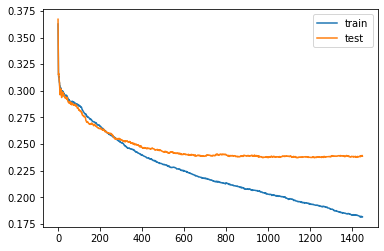

In [ ]:
import matplotlib.pyplot as plt


plt.plot(results['validation_0']['merror'], label='train')
plt.plot(results['validation_1']['merror'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
final_model = xgb_model
final_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8317540932029415, gamma=0,
              learning_rate=0.0137862728396222, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=1449, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0.1388862437769181, reg_lambda=3.1226572110801785,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.5564735469870117, verbosity=1)

In [ ]:
test = pd.read_csv("test_x.csv")

In [ ]:
test.head()

,id,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,Usage
0,640,5.1724,5.97,6,-6.726,0,0.4320,0.24000,0.0000,0.214,0.266,139.937,audio_features,133000,NaN,37.223242,2,Public
1,11990,6.2444,7.05,11,-7.835,0,0.7720,0.76400,0.0240,0.216,0.528,118.996,audio_features,98899,NaN,62.829888,3,Public
2,5990,2.8743,9.22,11,-3.789,1,0.2304,0.03070,0.1370,0.328,0.569,174.967,audio_features,271273,Liqduicity Drum & Bass,99.556223,18,Public
3,16887,3.5041,8.60,11,-2.810,0,0.1504,0.02390,0.0191,0.402,0.307,155.002,audio_features,139200,Euphoric Hardstyle,47.585614,12,Public
4,12783,5.0183,6.05,8,-9.359,0,0.3440,0.00186,0.0381,0.230,0.966,142.024,audio_features,251733,NaN,137.195184,14,Public


In [ ]:
#drop type first
test = test.drop(labels=["type"],axis=1)
#Change title Nan label
test["title"] = test["title"].fillna("Other")
#categorise title
test["title"] = le_titles.transform(test.title)
#convert time to seconds
test["TimeLength"] = test["TimeLength"]/(60*100)
# Drop valence due to heavily correlated
test = test.drop(labels=["valence"],axis=1)
#

In [ ]:
print(pd.DataFrame(test).isna().sum())

id                 0
Rhythm            22
vibrance           0
key                0
Decibel_Levels     0
mode               0
lyrics_amount      0
acoustics         20
instruments        0
bounce             0
Beats_Speed        0
TimeLength         0
title              0
Hyperactivity      0
MusicEraRating     0
Usage              0
dtype: int64


In [ ]:

##Check for na and replace if na there 
test['Rhythm'].fillna(test['Rhythm'].mean(),inplace=True)
test['vibrance'].fillna(test['vibrance'].mean(),inplace=True)
test['acoustics'].fillna(test['acoustics'].mean(),inplace=True)
test['Beats_Speed'].fillna(test['Beats_Speed'].mean(),inplace=True)

In [ ]:
#Check for Null again
print(pd.DataFrame(test).isna().sum())

id                0
Rhythm            0
vibrance          0
key               0
Decibel_Levels    0
mode              0
lyrics_amount     0
acoustics         0
instruments       0
bounce            0
Beats_Speed       0
TimeLength        0
title             0
Hyperactivity     0
MusicEraRating    0
Usage             0
dtype: int64


In [ ]:
test.head()

,id,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,Beats_Speed,TimeLength,title,Hyperactivity,MusicEraRating,Usage
0,640,5.1724,5.97,6,-6.726,0,0.4320,0.24000,0.0000,0.214,139.937,22.166667,56,37.223242,2,Public
1,11990,6.2444,7.05,11,-7.835,0,0.7720,0.76400,0.0240,0.216,118.996,16.483167,56,62.829888,3,Public
2,5990,2.8743,9.22,11,-3.789,1,0.2304,0.03070,0.1370,0.328,174.967,45.212167,47,99.556223,18,Public
3,16887,3.5041,8.60,11,-2.810,0,0.1504,0.02390,0.0191,0.402,155.002,23.200000,28,47.585614,12,Public
4,12783,5.0183,6.05,8,-9.359,0,0.3440,0.00186,0.0381,0.230,142.024,41.955500,56,137.195184,14,Public


In [ ]:
#Remove the Usage column and take out the id column
test = test.drop(labels=["Usage"],axis=1)


In [ ]:
test.head()

,id,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,Beats_Speed,TimeLength,title,Hyperactivity,MusicEraRating
0,640,5.1724,5.97,6,-6.726,0,0.4320,0.24000,0.0000,0.214,139.937,22.166667,56,37.223242,2
1,11990,6.2444,7.05,11,-7.835,0,0.7720,0.76400,0.0240,0.216,118.996,16.483167,56,62.829888,3
2,5990,2.8743,9.22,11,-3.789,1,0.2304,0.03070,0.1370,0.328,174.967,45.212167,47,99.556223,18
3,16887,3.5041,8.60,11,-2.810,0,0.1504,0.02390,0.0191,0.402,155.002,23.200000,28,47.585614,12
4,12783,5.0183,6.05,8,-9.359,0,0.3440,0.00186,0.0381,0.230,142.024,41.955500,56,137.195184,14


In [ ]:
test.iloc[:,1:-1]

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,Beats_Speed,TimeLength,title,Hyperactivity
0,5.1724,5.97,6,-6.726,0,0.4320,0.240000,0.0000,0.2140,139.937,22.166667,56,37.223242
1,6.2444,7.05,11,-7.835,0,0.7720,0.764000,0.0240,0.2160,118.996,16.483167,56,62.829888
2,2.8743,9.22,11,-3.789,1,0.2304,0.030700,0.1370,0.3280,174.967,45.212167,47,99.556223
3,3.5041,8.60,11,-2.810,0,0.1504,0.023900,0.0191,0.4020,155.002,23.200000,28,47.585614
4,5.0183,6.05,8,-9.359,0,0.3440,0.001860,0.0381,0.2300,142.024,41.955500,56,137.195184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,5.0518,9.50,6,-7.612,1,0.1596,0.000499,0.8820,0.2260,135.005,87.111167,64,21.465795
5284,1.3802,9.08,9,-4.291,0,0.4160,0.000033,0.0008,0.7840,164.197,30.820000,56,33.824582
5285,5.9898,6.51,2,-6.385,1,0.5600,0.030300,0.7210,0.1352,123.999,41.653167,90,82.211337
5286,5.5677,8.14,2,-7.364,1,1.6800,0.059800,0.0134,0.1112,156.985,20.756500,56,61.067165


In [ ]:
test_id = test.iloc[:,0]
test_X = test.iloc[:,1:]

In [ ]:
X_val.columns

Index(['Rhythm', 'vibrance', 'key', 'Decibel_Levels', 'mode', 'lyrics_amount',
       'acoustics', 'instruments', 'bounce', 'Beats_Speed', 'TimeLength',
       'title', 'Hyperactivity', 'MusicEraRating'],
      dtype='object')

In [ ]:
test_X.columns

Index(['Rhythm', 'vibrance', 'key', 'Decibel_Levels', 'mode', 'lyrics_amount',
       'acoustics', 'instruments', 'bounce', 'Beats_Speed', 'TimeLength',
       'title', 'Hyperactivity', 'MusicEraRating'],
      dtype='object')

In [ ]:
#test_pred = xgb_model.predict(test_X)
test_pred = final_model.predict(test_X)

In [ ]:
test_pred

array([ 5,  5,  1, ...,  2,  5, 11])

In [ ]:
genre_labels = labels.inverse_transform(test_pred)

In [ ]:
test_id.values

array([  640, 11990,  5990, ..., 19587,  9685, 20585])

In [ ]:
test_submission = pd.DataFrame(data={"id":test_id.values,"genre": genre_labels})

In [ ]:
test_submission.head()

,id,genre
0,640,Hipstter-Hop
1,11990,Hipstter-Hop
2,5990,Drums & Bass
3,16887,hardstyle
4,12783,Hiphop


In [ ]:
test_submission.to_csv("submission.csv",index=False)